# 《python数据可视化之matplotlib实践》
## matplotlib可视化学习-chapter-8
## 坐标轴高阶应用


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False # 不使用unicode_minus模式处理坐标轴轴线为负数的情况，


## 两种方法控制坐标轴刻度的显示

- ax.set_xticks() or ax.set_yticks()
- plt.setp()

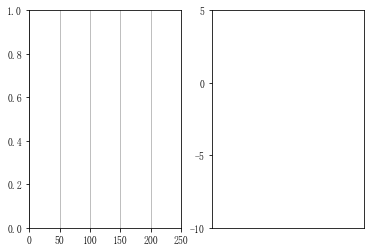

In [3]:



ax1 = plt.subplot(121)
ax1.set_xticks(range(0, 251, 50)) # 设置x轴坐标从0到250， 每隔50刻度一次
plt.grid(axis='x')  # 注意，网格线是根据tick刻度来画的，有几个刻度画几条线

ax2 = plt.subplot(122)
ax2.set_xticks([]) # 设置x轴坐标为空
ax2.set_yticks(range(-10,10, 5)) # 设置y轴坐标，从-10到10， 每隔5刻度一次
plt.grid(axis='x')# 注意，网格线是根据tick刻度来画的，有几个刻度画几条线，该子图没有x刻度，则不会划线

plt.show()

No handles with labels found to put in legend.


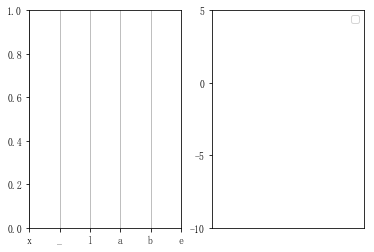

In [5]:

t = np.arange(0.05, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.cos(t)

ax1 = plt.subplot(121)
ax1.set_xticks(range(0, 251, 50)) # 设置x轴坐标从0到250， 每隔50刻度一次
plt.grid(axis='x')  # 注意，网格线是根据tick刻度来画的，有几个刻度画几条线

ax2 = plt.subplot(122)
ax2.set_xticks([]) # 设置x轴坐标为空
ax2.set_yticks(range(-10,10, 5)) # 设置y轴坐标，从-10到10， 每隔5刻度一次
plt.grid(axis='x')# 注意，网格线是根据tick刻度来画的，有几个刻度画几条线，该子图没有x刻度，则不会划线

plt.legend()
plt.show()

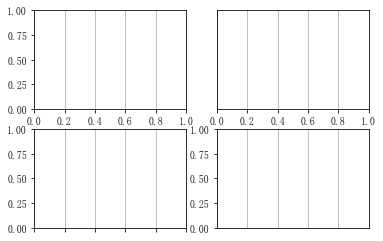

In [13]:
# 方法二 setp

ax1 = plt.subplot(221)
plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax1.get_xticklines(), visible=True)
plt.grid(axis='x')

ax2 = plt.subplot(222)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklines(), visible=False)
plt.grid(axis='x')

ax3 = plt.subplot(223)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklines(), visible=True)  # 与下面那个子图相比，少了x轴的刻度线
plt.grid(axis='x')

ax4 = plt.subplot(224)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklines(), visible=False) # 
plt.grid(axis='x')



## 控制坐标轴的显示
通过坐标轴的载体（spines， 轴脊）控制， 轴脊上有刻度线和刻度标签

一个图有4个轴脊，上下左右边框

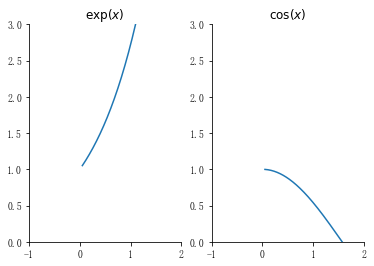

In [26]:
## 控制坐标轴的显示

t = np.arange(0.05, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.cos(t)

ax1 = plt.subplot(121)
ax1.spines['right'].set_color('none')  # 不显示上面、右边的刻度线
ax1.spines['top'].set_color('none')
ax1.set_xlim(-1, 2)
ax1.set_ylim(0,3)
plt.title("$\exp(x)$")
plt.plot(t, s1)


ax2 = plt.subplot(122)
ax2.spines['right'].set_color('none')  # 不显示上面、右边的刻度线
ax2.spines['top'].set_color('none') 

ax2.xaxis.set_ticks_position('bottom') # 把刻度线移动到下面，也可以不写（默认）


ax2.set_xlim(-1, 2)
ax2.set_ylim(0,3)
plt.title("$\cos(x)$")
plt.plot(t, s2)
plt.show()


## 移动坐标轴位置

示例：画一个坐标系，（0,0）为坐标原点

方法： 
- 把右边刻度线、上面刻度线取消（颜色为none）

- 再移动左轴和下轴的位置




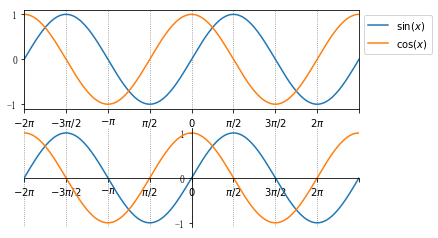

In [32]:
## 设置刻度范围和刻度标签

x = np.linspace(-2*np.pi, 2*np.pi, 200)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.subplot(211) # 2行1列，指定第二个子图
# 1. 刻度以圆周率形式展示
# 2. 设置合理的范围
plt.xlim(-2*np.pi, 2*np.pi)
plt.xticks([-2*np.pi, -1.5 *np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
		[r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$\pi/2$',r'$0$',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$'])

plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.grid(axis='x',color='gray',ls=":")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5,0.9,0.9))


ax = plt.subplot(212)
# 1. 取消两个轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# 2. 移动两个轴
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.set_xlim(-2*np.pi, 2*np.pi) # 这里通过ax设置,也可以通过plt设置
plt.xticks([-2*np.pi, -1.5 *np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],  # 这里通过plt设置
		[r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$\pi/2$',r'$0$',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$'])

plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.grid(axis='x',color='gray',ls=":")
plt.show()


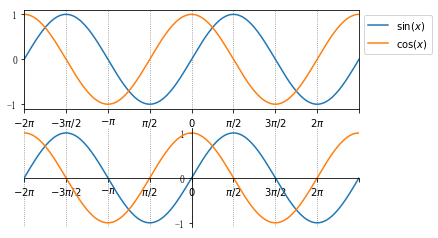

In [34]:
## 设置刻度范围和刻度标签

x = np.linspace(-2*np.pi, 2*np.pi, 200)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.subplot(211) # 2行1列，指定第二个子图
# 1. 刻度以圆周率形式展示
# 2. 设置合理的范围
plt.xlim(-2*np.pi, 2*np.pi)
plt.xticks([-2*np.pi, -1.5 *np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
		[r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$\pi/2$',r'$0$',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$'])

plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.grid(axis='x',color='gray',ls=":")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5,0.9,0.9))


ax = plt.subplot(212)
# 1. 取消两个轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# 2. 移动两个轴
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

plt.xlim(-2*np.pi, 2*np.pi) # 这里通过ax设置
plt.xticks([-2*np.pi, -1.5 *np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],  # 这里通过plt设置
		[r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$\pi/2$',r'$0$',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$'])

plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.grid(axis='x',color='gray',ls=":")
plt.show()


In [40]:
'''

set_position(self, position)[source]
Set the position of the spine.

Spine position is specified by a 2 tuple of (position type, amount). The position types are:

'outward' : place the spine out from the data area by the specified number of points. (Negative values specify placing the spine inward.)
'axes' : place the spine at the specified Axes coordinate (from 0.0-1.0).
'data' : place the spine at the specified data coordinate.
Additionally, shorthand notations define a special positions:

'center' -> ('axes',0.5)
'zero' -> ('data', 0.0)

'''

"\n\nset_position(self, position)[source]\nSet the position of the spine.\n\nSpine position is specified by a 2 tuple of (position type, amount). The position types are:\n\n'outward' : place the spine out from the data area by the specified number of points. (Negative values specify placing the spine inward.)\n'axes' : place the spine at the specified Axes coordinate (from 0.0-1.0).\n'data' : place the spine at the specified data coordinate.\nAdditionally, shorthand notations define a special positions:\n\n'center' -> ('axes',0.5)\n'zero' -> ('data', 0.0)\n\n"

In [42]:
np.linspace(1,1,10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])